# Шаблоны

   __Шаблоны Django__ - это мощный инструмент для создания динамических веб-страниц. Они позволяют отделять HTML-код от Python-кода в представлениях, упрощая разработку и поддержку веб-приложений.

Шаблон содержит статические части желаемого вывода HTML, а также некоторый специальный синтаксис, описывающий, как будет вставлен динамический контент.

   Django определяет стандартный API для загрузки и рендеринга шаблонов независимо от серверной части. Загрузка состоит из поиска шаблона для данного идентификатора и его предварительной обработки, обычно компилируя его в представление в памяти. Рендеринг означает интерполяцию шаблона с данными контекста и возврат результирующей строки.

## Язык шаблонов Django

__Шаблон Django__ - это текстовый документ или строка Python, размеченная с использованием языка шаблонов Django. Некоторые конструкции распознаются и интерпретируются механизмом шаблонов. Основные из них - __переменные__ и __теги__.<br></br>

Шаблон отображается с контекстом. Визуализация заменяет переменные их значениями, которые ищутся в контексте, и выполняет теги. Все остальное выводится как есть.<br></br>

Синтаксис языка шаблонов Django включает четыре конструкции:



### Переменные

__Переменная__ выводит значение из контекста, которое представляет собой dict-подобный объект, отображающий ключи к значениям.<br></br>

Переменные окружены {{ ... }}:

In [ ]:
My first name is {{ first_name }}. My last name is {{ last_name }}.

Поиск по словарю, поиск по атрибутам и поиск по списку-индексу реализованы с использованием точечной нотации:

In [ ]:
{{ dict.key }}
{{ object.attribute }}
{{ list.0 }}

Если переменная преобразуется в вызываемый объект, система шаблонов вызовет его без аргументов и будет использовать его результат вместо вызываемого.

### Теги

__Теги__ обеспечивают произвольную логику в процессе рендеринга.<br></br>

Тег может выводить контент, служить структурой управления, например, оператором «if» или циклом «for», захватывать контент из базы данных или даже обеспечивать доступ к другим тегам шаблона.<br></br>

Теги окружены {% ... %}:

In [ ]:
{% csrf_token %}

Большинство тегов принимают аргументы:

In [ ]:
{% cycle 'odd' 'even' %}

Для некоторых тегов требуются начальные и конечные теги:

In [ ]:
{% if user.is_authenticated %} 

    Hello, {{ user.username }}.
    
{% endif %}

### Фильтры 

__Фильтры__ преобразуют значения переменных и аргументов тегов.

In [ ]:
{{ django|title }}

В контексте этот шаблон отображает: __{'django': 'the web framework for perfectionists with deadlines'}__

In [ ]:
The Web Framework For Perfectionists With Deadlines

Некоторые фильтры принимают аргумент:

In [ ]:
{{ today|date:"Y-m-d" }}

### Комментарии

Комментарии выглядят так:

In [ ]:
{# Это не зарендерится #}

Тег обеспечивает многострочные комментарии.

In [ ]:
{% comment %}

## Использование render_to_string() и render()

Перепишем представления приложения tasks с использованием шаблонов.

Создайте внутри приложения tasks следующую директорию и поддиректорию:

In [ ]:
tasks/
├── templates/
    ├── tasks/

По умолчанию, Django ищет шаблоны в подкаталоге templates нашего приложения. Чтобы избежать коллизий имен файлов всех приложений в templates приложения принято создавать еще один подкаталог с именем приложения. И уже в него помещать файлы шаблонов.

Внутри новой поддиректории tasks создадим шаблон __index.html__:

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Title</title>
</head>
<body>
     <h1>Страница приложения tasks</h1>
     <a href="{% url 'tasks:projects_list' %}">Список проектов</a>
</body>
</html>

В этом HTML-шаблоне используется шаблонный тег __{% url %}__, который генерирует URL по имени маршрута. В данном случае он создает ссылку на представление __projects_list__ в приложении __tasks__.

Перейдем в файл __views.py__ и изменим представление __index()__:

In [ ]:
from django.template.loader import render_to_string

def index(request):
    template = render_to_string('tasks/index.html')
    return HttpResponse(template)

Сначала мы импортируем функции, через которые запускается встроенный в Django шаблонизатор. В самом простом варианте можно использовать функцию __render_to_string__ пакета __django.template.loader__, которая загружает шаблон из файла, обрабатывает его и выдает результат в виде строки.

При обновлении главной страницы приложения tasks в браузере, мы увидим этот шаблон. Но можно сделать еще лучше и воспользоваться функцией:

In [ ]:
from django.shortcuts import render

которая объединяет в себе рендер шаблона и формирование ответа сервера. В результате функция представления index() может быть записана так:

In [ ]:
from django.shortcuts import render

def index(request):
    return render(request, 'tasks/index.html')

При этом файл tasks/urls.py остается прежним:

In [ ]:
from django.urls import path
from tasks import views

app_name = 'tasks'

urlpatterns = [
    path('', views.index),
    path('projects/', views.projects_list, name='projects_list'),
    path('projects/<int:project_id>/', views.project_detail, name='project_detail'),
    path('projects/<int:project_id>/tasks/<int:task_id>/', views.task_detail, name='task_detail'),
    # path('', views.IndexView.as_view(), name='index'),
    # path('projects/', views.ProjectsListView.as_view(), name='projects_list'),
    # path('projects/<int:project_id>/', views.ProjectDetailView.as_view(), name='project_detail'),
    # path('projects/<int:project_id>/tasks/<int:task_id>/', views.TaskDetailView.as_view(), name='task_detail'),
]

## Передача данных в шаблоны

### FBV (Представления основанные на функция)

В шаблонах можно прописывать конструкции для отображения информации, например, из переменных или БД. Перепишем представление  __projects_list()__ в __файле views.py__:

In [ ]:
def projects_list(request):
    projects = Project.objects.all()
    return render(request, 'tasks/projects_list.html', {'project_list': projects})

Первым аргументом в функцию __render__ передается путь до шаблона __projects_list.html__, вторым аргументом передается __контекст - словарь с данными__, в нашем случае, список проектов.

Создадим шаблон __projects_list.html__ в templates/tasks/:

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Title</title>
</head>
<body>
    <h1>Список проектов</h1>
    <ul>
        {% for project in project_list %}
            <li><a href="{% url 'tasks:project_detail' project.id %}">{{ project.name }}</a></li>
        {% endfor %}
    </ul>
</body>
</html>

   В данном шаблоне используется тег __{% for %}__ для того, чтобы циклом пройтись по всему списку __projects__. Внутри цикла мы обращаемся к атрибутам project через точку "." и выводим их, окружая __{{ ... }}__. В тег __{% url %}__ включается переменная __project.id__ для передачи ее по маршруту __project_detail__ в представление __project_detail()__.

Аналогично, перепишем __project_detail(), task_detail()__:

In [ ]:
def project_detail(request, project_id):
    project = get_object_or_404(Project, id=project_id)
    return render(request, 'tasks/project_detail.html', {'project': project})

def task_detail(request, project_id, task_id):
    task = get_object_or_404(Task, id=task_id, project_id=project_id)
    return render(request, 'tasks/task_detail.html', {'task': task})

И создадим соответствующие шаблоны:

tasks/project_detail.html:

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Title</title>
</head>
<body>
    <h1>{{ project.name }}</h1>
    <p>{{ project.description }}</p>

    <h2>Задачи в проекте</h2>
    <ul>
        {% for task in project.tasks.all %}
            <li><a href="{% url 'tasks:task_detail' project.id task.id %}">{{ task.name }}</a> - {{ task.status }}</li>
        {% empty %}
            <li>В этом проекте пока нет задач.</li>
        {% endfor %}
    </ul>
</body>
</html>

   В данном случае используется цикл __{% for task in project.tasks.all %}__, чтобы перебрать все задачи, связанные с проектом. Здесь __project.tasks.all__ вызывает метод __all()__ менеджера связанных объектов для получения всех задач, связанных с этим проектом.<br></br>
   Для каждой задачи создается гиперссылка, ведущая на страницу с деталями этой задачи. URL генерируется с помощью тега __{% url %}__, который принимает имя маршрута и параметры для генерации соответствующего URL.<br></br>
   Условие __{% empty %}__: Это условие используется для отображения сообщения, если у проекта нет связанных задач.

tasks/task_detail.html:

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Title</title>
</head>
<body>
    <h1>{{ task.name }}</h1>
    <p>{{ task.description }}</p>

</body>
</html>

Запустив тестовый сервер можно проверить, что все работает, но теперь наш код стал более структурированным и читаемым.

### СBV (Представления основанные на классах)

СBV также поддерживают шаблоны. Перепишем представления __IndexView(), ProjectsListView(), ProjectDetailView(), TaskDetailView()__ в файле __views.py__: 

In [ ]:
class IndexView(View):
    def get(self, request, *args, **kwargs):
        return render(request, 'tasks/index.html')

   __IndexView__ в методе __get()__ переписан для использования метода __render__, который загружает шаблон __index.html__.

In [ ]:
class ProjectsListView(ListView):
    model = Project
    template_name = 'tasks/projects_list.html'

   __ProjectsListView__ автоматически использует шаблон __projects_list.html__, путь до которого прописывается в __template_name__. В шаблон автоматически передается контекст из списка  всех объектов __Project__. Это упрощает код, так как Django сам заботится о извлечении объектов и передаче их в шаблон.

In [ ]:
class ProjectDetailView(DetailView):
    model = Project
    pk_url_kwarg = 'project_id'
    template_name = 'tasks/project_detail.html'

__ProjectDetailView__ автоматически обрабатывает объект __Project__ c __pk = project_id__, передавая его данные в шаблон __project_detail.html__. Это упрощает отображение деталей проекта и связанных с ним задач.

In [ ]:
class TaskDetailView(DetailView):
    model = Task
    pk_url_kwarg = 'task_id'
    template_name = 'tasks/task_detail.html'

__TaskDetailView__ использует шаблон __task_detail.html__ для отображения информации о задаче с __pk = task_id__.

## Наследование шаблонов

   Наследование шаблонов в Django — это способ организации и повторного использования кода в шаблонах. Этот механизм позволяет создавать базовый "скелет" и затем расширять или модифицировать его в других шаблонах.

Создайте директорию __templates__ и поддиректорию __base__ в корневой директории проекта:

In [ ]:
project_tracker/
├── project_tracker/
├── tasks/
├── templates/
    ├── base/

Cоздайте файл __base/base.html__:

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>{% block title %}{% endblock %}</title>
</head>
<body>
    <header>
        <!-- Общий заголовок для всех страниц -->
        <h1>Проект project-tracker</h1>
    </header>

    <nav>
        <!-- Навигационное меню -->
        <a href="{% url 'tasks:index' %}">Приложение tasks</a>
        <!-- Другие ссылки -->
    </nav>

    <main>
        {% block content %}
        <!-- Основное содержимое страницы -->
        {% endblock %}
    </main>

    <footer>
        <!-- Общий футер для всех страниц -->
    </footer>
</body>
</html>

Это основной шаблон, содержащий общую структуру страницы (HTML-разметку, общий для всех страниц заголовок и футер)

Внутри основного шаблона определяются блоки (__{% block block_name %}__), которые будут переопределяться в дочерних шаблонах.

Настроим Django на поиск шаблонов в каталоге templates. Добавим в __settings.py__ в разделе __TEMPLATES__ следующее:

In [ ]:
TEMPLATES = [
    {
        "BACKEND": "django.template.backends.django.DjangoTemplates",
        # Изменен список "DIRS  
        "DIRS": [os.path.join(BASE_DIR, 'templates')],
        "APP_DIRS": True,
        "OPTIONS": {
            "context_processors": [
                "django.template.context_processors.debug",
                "django.template.context_processors.request",
                "django.contrib.auth.context_processors.auth",
                "django.contrib.messages.context_processors.messages",
            ],
        },
    },
]

Изменим шаблон __index.html__ приложения __tasks__:

In [ ]:
{% extends 'base/base.html' %}

{% block content %}
        <h1>Страница приложения tasks</h1>
        <a href="{% url 'tasks:projects_list' %}">Список проектов</a>
{% endblock %}

__{% extends 'base/base.html' %}__ определяет, что __index.html__ "наследует" __base.html__.

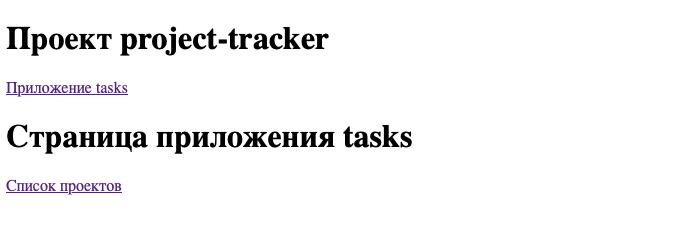

Аналогично изменим остальные шаблоны приложения __tasks__:

__projects_list.html:__

In [ ]:
{% extends 'base/base.html' %}

{% block content %}
    <h1>Список проектов</h1>
    <ul>
        {% for project in project_list %}
            <li><a href="{% url 'tasks:project_detail' project.id %}">{{ project.name }}</a></li>
        {% endfor %}
    </ul>
{% endblock %}

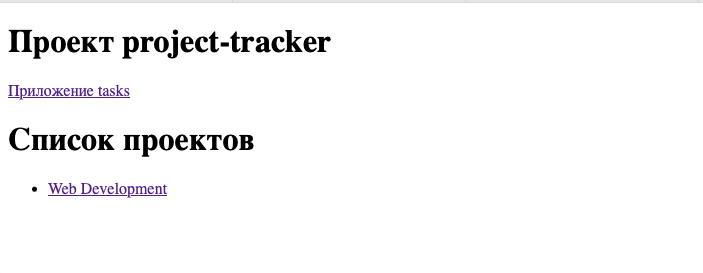

__project_detail.html:__

In [ ]:
{% extends 'base/base.html' %}

{% block content %}
    <h1>{{ project.name }}</h1>
    <p>{{ project.description }}</p>

    <h2>Задачи в проекте</h2>
    <ul>
        {% for task in project.tasks.all %}
            <li><a href="{% url 'tasks:task_detail' project.id task.id %}">{{ task.name }}</a> - {{ task.status }}</li>
        {% empty %}
            <li>В этом проекте пока нет задач.</li>
        {% endfor %}
    </ul>
{% endblock %}

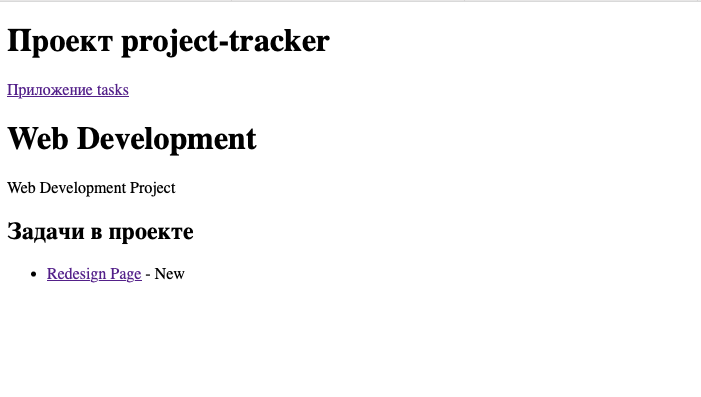

__task_detail.html:__

In [ ]:
{% extends 'base/base.html' %}

{% block content %}
    <h1>{{ project.name }}</h1>
    <p>{{ project.description }}</p>

    <h2>Задачи в проекте</h2>
    <ul>
        {% for task in project.tasks.all %}
            <li><a href="{% url 'tasks:task_detail' project.id task.id %}">{{ task.name }}</a> - {{ task.status }}</li>
        {% empty %}
            <li>В этом проекте пока нет задач.</li>
        {% endfor %}
    </ul>
{% endblock %}

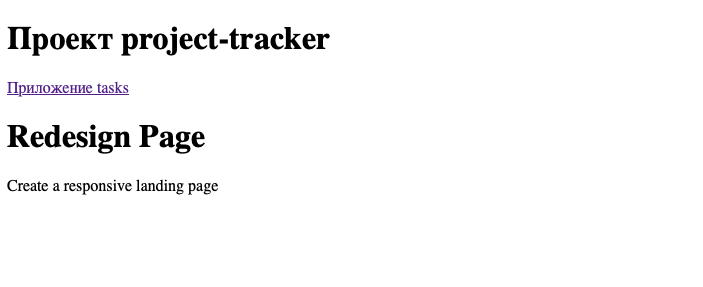

Каждый из этих шаблонов переопределяет блок __content__. Весь остальной контент (заголовок, навигационное меню и футер) наследуется от __base.html__ без изменений.

__Преимущества наследования шаблонов:__
   * __Переиспользование кода__: Общие элементы шаблонов нужно написать только один раз.
   * __Легкость обслуживания__: Изменения в общих элементах сайта можно вносить в одном месте, а не в каждом шаблоне по отдельности.
   * __Гибкость__: Можно легко создавать различные макеты страниц, наследуя один базовый шаблон и переопределяя необходимые блоки.

## Тег include

   Тег __{% include %}__ позволяет вставлять один шаблон в другой.<br></br> Это удобный способ повторного использования частей HTML-кода на разных страницах. Применение __{% include %}__ способствует уменьшению дублирования кода и упрощает управление изменениями в проекте.<br></br>
   При использовании __{% include %}__, шаблон наследует контекст родительского шаблона. Это означает, что переменные, определенные в родительском шаблоне, будут доступны во вставленном шаблоне.

Вынесем навигационное меню в отдельный шаблон. Создадим шаблон __base/nav.html__:

In [ ]:
<nav>
    <!-- Навигационное меню -->
    <a href="{% url 'tasks:index' %}">Приложение tasks</a>
    <!-- Другие ссылки -->
</nav>

И изменим __base/base.html__:

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>{% block title %}{% endblock %}</title>
</head>
<body>
    <header>
        <!-- Общий заголовок для всех страниц -->
      <h1>Проект project-tracker</h1>
    </header>
    {% include 'base/nav.html' %}
    <main>
        {% block content %}
        <!-- Основное содержимое страницы -->
        {% endblock %}
    </main>

    <footer>
        <!-- Общий футер для всех страниц -->
    </footer>
</body>
</html>


При включении, шаблон __base/nav.html__ имеет доступ ко всем параметрам, которые передаются в шаблон.

Чтобы запретить передачу переменных, то после пути к шаблону в теге include следует дополнительно прописать ключевое слово only:

In [ ]:
{% include 'base/nav.html' only %}

Если нужно при этом передать отдельные параметры, то это можно сделать с помощью ключевого слова with следующим образом:

In [ ]:
{% include 'base/nav.html' only with param='Django' %}

# Домашнее задание

1. Создайте шаблоны для основных страниц приложения __quality_control__.
2. При создании шаблонов используйте тег __{% extends %}__ для использования родительского шаблона __base.html__
3. В шаблон навигационного меню добавьте гиперссылку на основную страницу приложения __quality_control__.
4. Используя функцию __render__, перепишите все представления (FBV и CBV) приложения __quality_control__ для работы с соответствующими шаблонами.

Ссылка на документацию Django: https://docs.djangoproject.com/en/5.0/